In [1]:
import os

data_dir = os.path.join(os.curdir, 'data')

assert os.path.exists(data_dir)

# Exercise 6

## Task 1

### a)

In [2]:
import pandas as pd

data_filepath = os.path.join(data_dir, 'Concrete_Data.xls')

df = pd.read_excel(data_filepath)

# fix names
cols = df.columns
cols = cols.str.replace('\(.+\)', '')
cols = cols.str.rstrip()
df.columns = cols

df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### b)

In [3]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [4]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df, explorative=True)

# profile

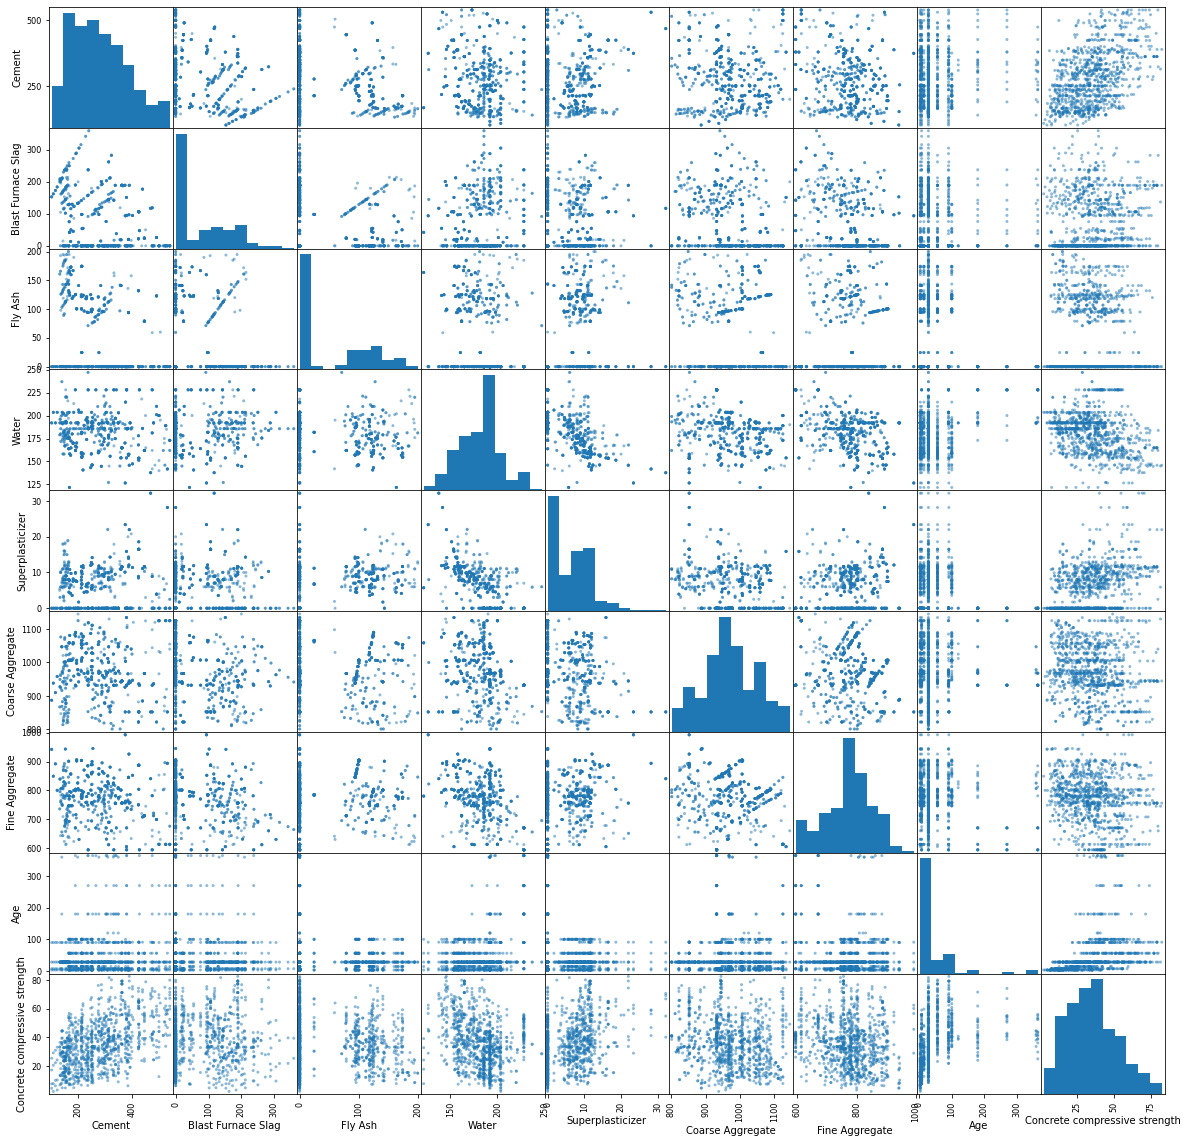

In [5]:
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(df)

plt.gcf().set_size_inches(20, 20)
plt.show()

### c)

In [6]:
df.shape

(1030, 9)

(824, 8)
(206, 8)


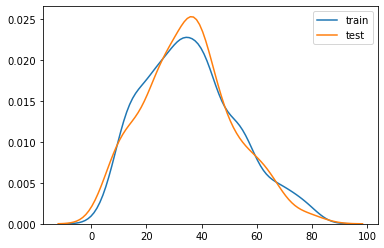

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('Concrete compressive strength', axis='columns').values
y = df['Concrete compressive strength'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

import seaborn as sns

sns.kdeplot(y_train, label='train')
sns.kdeplot(y_test, label='test')

plt.show()

### d)

In [8]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr = regr.fit(X_train, y_train)

regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### e)

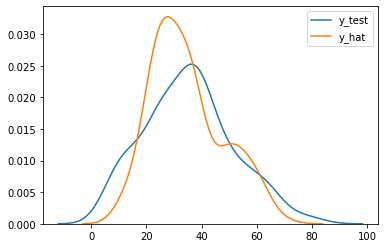

In [9]:
y_hat = regr.predict(X_test)

sns.kdeplot(y_test, label='y_test')
sns.kdeplot(y_hat, label='y_hat')

plt.show()

### f)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE: ', mean_squared_error(y_test, y_hat))
print('R2: ', r2_score(y_test, y_hat))

MSE:  112.58973565052526
R2:  0.5616070392814312


### g)

In [11]:
from sklearn.model_selection import cross_validate

regr = LinearRegression()

mse_cv_score = cross_validate(regr, X, y, cv=5, scoring='neg_mean_squared_error')['test_score']
r2_cv_score = cross_validate(regr, X, y, cv=5, scoring='r2')['test_score']

print('5-fold MSE: {} (std: {})'.format(-mse_cv_score.mean(), mse_cv_score.std()))
print('5-fold R2: {} (std: {})'.format(r2_cv_score.mean(), r2_cv_score.std()))

5-fold MSE: 128.11293019581817 (std: 47.29886585657092)
5-fold R2: 0.46106854740704184 (std: 0.09234110531390721)


### h)

In [23]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()

mse_cv_score = cross_validate(regr, X, y, cv=5, scoring='neg_mean_squared_error')['test_score']
r2_cv_score = cross_validate(regr, X, y, cv=5, scoring='r2')['test_score']

print('5-fold MSE: {} (std: {})'.format(-mse_cv_score.mean(), mse_cv_score.std()))
print('5-fold R2: {} (std: {})'.format(r2_cv_score.mean(), r2_cv_score.std()))

5-fold MSE: 129.02506524952668 (std: 122.14584178081303)
5-fold R2: 0.3228701329204446 (std: 0.8374712917959355)


In [18]:
from sklearn.svm import SVR

regr = SVR(kernel='poly', degree=10)

mse_cv_score = cross_validate(regr, X, y, cv=5, scoring='neg_mean_squared_error')['test_score']
r2_cv_score = cross_validate(regr, X, y, cv=5, scoring='r2')['test_score']

print('5-fold MSE: {} (std: {})'.format(-mse_cv_score.mean(), mse_cv_score.std()))
print('5-fold R2: {} (std: {})'.format(r2_cv_score.mean(), r2_cv_score.std()))

5-fold MSE: 113.35467970612471 (std: 35.791745079690195)
5-fold R2: 0.506051765372576 (std: 0.12317967188110455)


## Task 2

### a) & b)

In [13]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [19]:
target = iris['target']

target.map(dict(zip(range(len(iris['target_names'])),iris['target_names']))).astype('category')

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [15]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

df = iris['data']

df['class'] = iris['target']

# names to dict
target_names = dict(zip(range(len(iris['target_names'])), iris['target_names']))

df['class'] = df['class'].map(target_names)
df['class'] = df['class'].astype('category')

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### c)

In [21]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, explorative=True)

profile

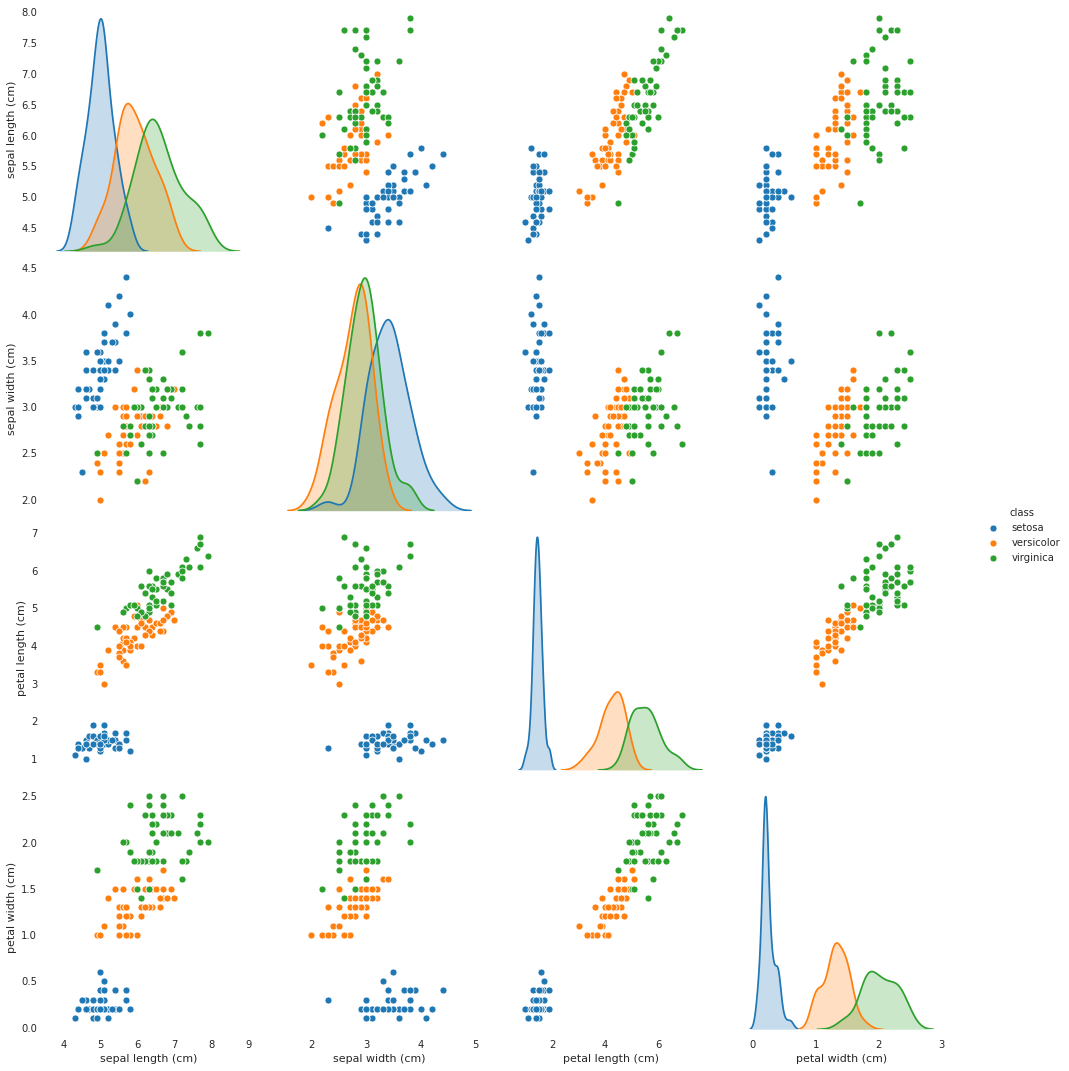

In [23]:
import seaborn as sns

sns.pairplot(data=df, hue='class')

plt.gcf().set_size_inches(15, 15)
plt.show()

### d)

In [24]:
df.shape

(150, 5)

(120, 4)
(30, 4)


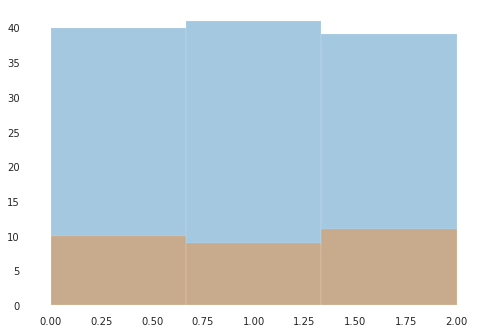

In [42]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis='columns').values
y = df['class'].cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

import seaborn as sns

sns.distplot(y_train, kde=False, bins=3, label='train')
sns.distplot(y_test, kde=False, bins=3, label='test')

plt.show()

### f)

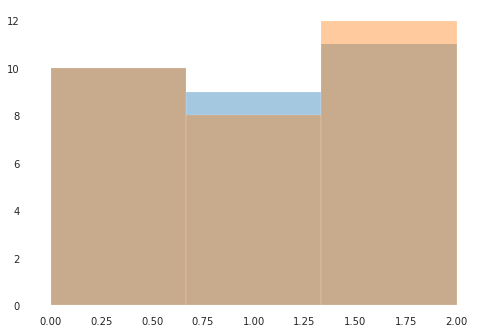

In [45]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)

sns.distplot(y_test, kde=False, bins=3, label='y_test')
sns.distplot(y_hat, kde=False, bins=3, label='y_hat')

plt.show()

### g)

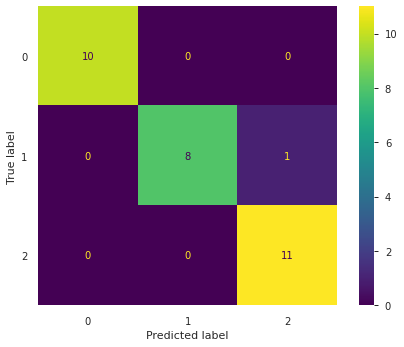

In [48]:
from sklearn.metrics import classification_report, plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

plt.show()

In [58]:
print(classification_report(y_test, y_hat, target_names=df['class'].cat.categories))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

